In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pystan
from scipy.stats import mstats
%matplotlib inline

In [2]:
plt.style.use("ggplot")

In [3]:
df = pd.read_excel("./data/real_estate1.xlsx")

In [4]:
stan_model = """
data {
  int N;
  real X[N];
  real Y[N];
  int N_s;
  real X_s[N_s];
}

parameters {
  real a;
  real b;
  real<lower=0> sigma;
}

model {
  for (n in 1:N){
    Y[n] ~ normal(a * X[n] + b, sigma);
  }
}

generated quantities {
  real Y_s[N_s];
  for (n in 1:N_s){
    Y_s[n] = normal_rng(a * X_s[n] + b, sigma);
  }
}

"""

In [5]:
sm = pystan.StanModel(model_code=stan_model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_81acff9de421dcd46dd949b5b0a70352 NOW.


In [6]:
X_s = np.arange(40,90,1)
N_s = X_s.shape[0]
stan_data = {"N":df.shape[0],"X":df["space"],"Y":df["value"],"N_s":N_s,"X_s":X_s}

In [7]:
fit = sm.sampling(data = stan_data, iter = 2000, warmup= 500, chains= 3, seed=123)

In [8]:
fit.extract("a")

OrderedDict([('a',
              array([ 72.46563069,  81.51198892,  83.85357741, ...,  63.03308754,
                      69.77733567,  98.7110358 ]))])

In [9]:
ms_a = fit.extract("a")["a"]

In [10]:
ms_a

array([ 72.46563069,  81.51198892,  83.85357741, ...,  63.03308754,
        69.77733567,  98.7110358 ])

(array([    4.,    20.,   133.,   421.,  1021.,  1324.,   998.,   432.,
          129.,    18.]),
 array([  29.18445048,   38.06869154,   46.9529326 ,   55.83717365,
          64.72141471,   73.60565577,   82.48989683,   91.37413789,
         100.25837895,  109.14262   ,  118.02686106]),
 <a list of 10 Patch objects>)

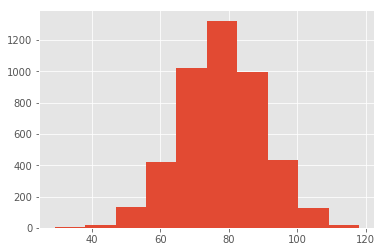

In [11]:
plt.hist(ms_a)

In [12]:
ms_b = fit.extract("b")["b"]

In [13]:
df_b = pd.DataFrame([])
for i in range(40, 90, 1):
    df_b[i] = ms_a * i + ms_b

In [14]:
df_b

,40,41,42,43,44,45,46,47,48,49,...,80,81,82,83,84,85,86,87,88,89
0,2511.577599,2584.043229,2656.508860,2728.974491,2801.440122,2873.905752,2946.371383,3018.837014,3091.302644,3163.768275,...,5410.202826,5482.668457,5555.134088,5627.599718,5700.065349,5772.530980,5844.996610,5917.462241,5989.927872,6062.393503
1,2306.237915,2387.749904,2469.261893,2550.773882,2632.285871,2713.797860,2795.309849,2876.821837,2958.333826,3039.845815,...,5566.717472,5648.229461,5729.741450,5811.253438,5892.765427,5974.277416,6055.789405,6137.301394,6218.813383,6300.325372
2,2325.682709,2409.536287,2493.389864,2577.243441,2661.097019,2744.950596,2828.804174,2912.657751,2996.511328,3080.364906,...,5679.825806,5763.679383,5847.532960,5931.386538,6015.240115,6099.093693,6182.947270,6266.800847,6350.654425,6434.508002
3,2595.022658,2675.599460,2756.176262,2836.753064,2917.329866,2997.906668,3078.483470,3159.060273,3239.637075,3320.213877,...,5818.094744,5898.671546,5979.248348,6059.825150,6140.401952,6220.978754,6301.555557,6382.132359,6462.709161,6543.285963
4,2609.874223,2678.940741,2748.007258,2817.073776,2886.140293,2955.206811,3024.273328,3093.339846,3162.406363,3231.472881,...,5372.534923,5441.601440,5510.667958,5579.734475,5648.800993,5717.867510,5786.934028,5856.000545,5925.067063,5994.133580
5,2245.050533,2327.062687,2409.074840,2491.086994,2573.099147,2655.111301,2737.123455,2819.135608,2901.147762,2983.159915,...,5525.536676,5607.548830,5689.560983,5771.573137,5853.585290,5935.597444,6017.609597,6099.621751,6181.633905,6263.646058
6,2414.903024,2493.382790,2571.862557,2650.342323,2728.822090,2807.301856,2885.781622,2964.261389,3042.741155,3121.220921,...,5554.093678,5632.573444,5711.053211,5789.532977,5868.012743,5946.492510,6024.972276,6103.452042,6181.931809,6260.411575
7,2308.038812,2392.346709,2476.654605,2560.962502,2645.270398,2729.578295,2813.886192,2898.194088,2982.501985,3066.809882,...,5680.354678,5764.662574,5848.970471,5933.278368,6017.586264,6101.894161,6186.202058,6270.509954,6354.817851,6439.125747
8,2522.517589,2602.517048,2682.516508,2762.515967,2842.515426,2922.514885,3002.514344,3082.513803,3162.513262,3242.512721,...,5722.495951,5802.495410,5882.494869,5962.494328,6042.493787,6122.493246,6202.492705,6282.492164,6362.491623,6442.491082
9,2893.851580,2953.757547,3013.663513,3073.569480,3133.475447,3193.381413,3253.287380,3313.193347,3373.099313,3433.005280,...,5290.090248,5349.996215,5409.902182,5469.808148,5529.714115,5589.620082,5649.526049,5709.432015,5769.337982,5829.243949


In [15]:
low_y50, high_y50 = mstats.mquantiles(df_b, [0.25,0.75], axis=0)
low_y95, high_y95 = mstats.mquantiles(df_b, [0.025,0.975], axis=0)

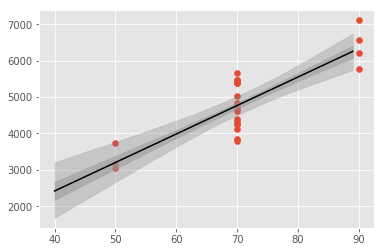

In [16]:
plt.scatter(df["space"],df["value"])
plt.fill_between(X_s, low_y50, high_y50, alpha=0.6, color="darkgray")
plt.fill_between(X_s, low_y95, high_y95, alpha=0.3, color="gray")
a = 78.3
b = -713.7
y = a * X_s + b
plt.plot(X_s, y, color ="black")

In [17]:
Y_p = fit.extract("Y_s")["Y_s"]

In [18]:
low_y, high_y = mstats.mquantiles(Y_p, [0.025,0.975], axis=0)

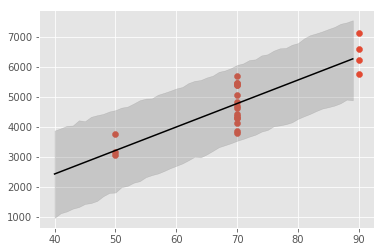

In [19]:
plt.scatter(df["space"],df["value"])
plt.fill_between(X_s, low_y, high_y, alpha=0.3, color="gray")
a = 78.3
b = -713.7
y = a * X_s + b
plt.plot(X_s, y, color ="black")